In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


# 이미지를 파일로 출력하고 로딩한 다음 글씨만 추출
def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)   

    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T   
    print("이미지차원", data.shape)
   
    print(data)
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    print("만든 갯수",X.shape)
    print((X * data.shape).shape)
    i, j = (X * data.shape).astype(int).T
   
    mask = (data[i, j] < 1)
    X = X[mask]
    print("새로운X갯수", X.shape)
    print("원래이미지의 차수 ", data.shape)
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]

    return X[np.argsort(X[:, 0])]

In [ ]:
X = make_hello(1000)
colorize = dict(c = X[:,0], cmap=plt.cm.get_cmap('rainbow',5))

plt.scatter(X[:,0], X[:,1], **colorize)
plt.axis('equal')

In [ ]:
print(X.shape)
def rotate(X, angle):
    theta = np.deg2rad(angle) # 라디안 : 호의 길이
    R = [[np.cos(theta), np.sin(theta)], # 2차원 행렬회전
        [-np.sin(theta), np.cos(theta)]]
    print(type(R))
    return np.dot(X,R)

X2 = rotate(X, 20) + 5
plt.scatter(X2[:,0], X2[:,1], **colorize)
plt.axis('equal')

In [ ]:
# 각 점들 간의 상호 거리
from sklearn.metrics import pairwise_distances # 디폴트 - 유클리디안거리[피타고라스 정리와 같다고 보면 됨]
D = pairwise_distances(X) #거리행렬
print(D.shape)
D[:5,:5]
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar()

In [ ]:
D2 = pairwise_distances(X2)
np.allclose(D, D2) # 원형을 유지

In [ ]:
# 다형체 manifold    MDS로 차원 축소
from sklearn.manifold import MDS

# precomputed : 미리 계산된 거리행렬을 이용해 차원 축소함
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:,0], out[:,1],**colorize)
plt.axis('equal')
print(out)

In [ ]:
import numpy as np
rng = np.random.RandomState(10) # seed 값
C = rng.randn(3,3)# normal
print(np.dot(C, C.T)) # 전치행렬, 행렬의 거듭제곱
# 하면 정방행렬, 대칭행렬이 나옴

e, V = np.linalg.eigh(np.dot(C, C.T))
print("eigenvector\n", V) # 고유벡터
print("eigenvalue\n", e) # 고유값[ 3축방향으로의 크기값]

np.dot(V[1], V[2]) # 두 벡터의 내적 => 0에 가까운 값이 나온다. 즉, 직교한다

In [ ]:
# 2차원의 데이터를 3차원으로 변환

def random_projection(X, dimension=3, rseed=42):

    assert dimension >= X.shape[1] # 행, 열(2차원) - > 차원확대만.
 
    rng = np.random.RandomState(rseed)
    
    C = rng.randn(dimension, dimension) # 3x3
    print("C는 ", C.shape)
    print(np.dot(C, C.T))# 정방행렬이면서 대칭행렬인

    e, V = np.linalg.eigh(np.dot(C, C.T)) # 고유치, 고유벡터
    print("V는 ", V.shape)# 3x3
    print("차원은 ", V[:X.shape[1]]) #2차원.

    return np.dot(X, V[:X.shape[1]]) # 3x2 변환

print(X.shape)
print(X.shape[1])
print("데이터의 차원은 ", X.shape)
X3 = random_projection(X, 3)
X3.shape

In [ ]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection = '3d')
ax.scatter3D(X3[:,0], X3[:,1], X3[:,2], **colorize)
ax.view_init(azim=60, elev=30) # 3차원에서 카메라 각도

In [ ]:
# 3차원 데이터를 다시 차원축소 해보자

model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal')

In [ ]:
def make_hello_s_curve(X):
    t = (X[:,0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:,1]
    z = np.sign(t) * (np.cos(t) - 1)# sign = +-
    return np.vstack((x,y,z)).T

XS = make_hello_s_curve(X)
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:,0], XS[:,1], XS[:,2], **colorize)

# MDS는 비선형에 취약하다, 선형에는 강하다.

In [ ]:
# MDS는 비선형에서 모양유지가 안됨

model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(XS)
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal')

# LLE(locally linear embedding)
- 비선형에 강함

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
out = model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(out[:,0], out[:,1], **colorize)
ax.set_ylim(0.15, -0.15)

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import manifold # 다형체
from matplotlib import pylab
from sklearn.manifold import MDS
from mpl_toolkits import mplot3d
import os # 디렉토리 관리

CHART_DIR = "./"
colors = ["r", "g", "b"]
markers = ["o", 6, "*"]

def plot_iris_mds():
    iris = load_iris()
    X = iris.data
    y = iris.target
    fig = pylab.figure(figsize=(10, 4))
    ax = fig.add_subplot(121, projection='3d') #
    ax.set_facecolor('white')
    mds = manifold.MDS(n_components=3)# 변수 4 -> 3으로
    # 시각화는 3차원혹은 2차원으로 표현해야하니까
    
    Xtrans = mds.fit_transform(X)# 150x3
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black')
    pylab.title("3 dimension iris MDS")
    ax.view_init(10, -15) # 카메라 각도 조절

    mds = manifold.MDS(n_components=2) # 2차원으로!
    Xtrans = mds.fit_transform(X)

    ax = fig.add_subplot(122)
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
    pylab.title("2 dimension iris MDS")

    filename = "mds_demo_iris.png"
    pylab.savefig(os.path.join(CHART_DIR, filename), bbox_inches="tight")
    
plot_iris_mds()

NameError: name 'np' is not defined

In [ ]:
# K-means :
- 군집분석하는 이유 :
    - 종속변수결정
    - 압축 : ex) 팔레트, 실제데이터에는 팔레트번호로 (256) 1바이트
    - 원형 이상치 제거
    - 미리 군집화하여 문제해결에 도움을 줌
    
# 알고리즘 - k값을 결정(군집수를 결정), 중심값 : 재계산 할 때마다 변한다.
    - 문제점 : 이상치에 민감.
        
# k-means의 척도 : 거리값(피타고라스 정리 -> 유클리디안 거리(Euclidian distance))
- 중심간의 거리

# DBSCAN : eps?기본거리값, (군집이 되기 위한)최소요소수를 주어 근거리에 있는 것 끼리 군집
    - 핵심, 경계, 어느 군집에도 속하지 않는 것이 생김.

In [ ]:
import scipy
import sklearn.metrics.pairwise

a_64 = np.array([61.22, 71.60, -65.755], dtype=np.float64)
b_64 = np.array([61.22, 71.608, -65.72], dtype=np.float64)
a_32 = a_64.astype(np.float32)
b_32 = b_64.astype(np.float32)
# norm : 원점으로부터의 크기(단일)

dist_64_np = np.array([np.linalg.norm(a_64 - b_64)], dtype=np.float64)
dist_32_np = np.array([np.linalg.norm(a_32 - b_32)], dtype=np.float32)

# metric 옵션의 default는 euclidian distance
# manhattan 거리는 수평 수직 거리
dist_64_sklearn = sklearn.metrics.pairwise.pairwise_distances([a_64], [b_32], metric="manhattan")# 두개의 벡터 거리값을 알기위한 함수

# 유클리디안 거리값 구하는 함수는 하기와 같다
from sklearn.metrics.pairwise import euclidean_distances

# 이거 왜 하냐?
# 특성이 가까운지 먼지 알기 위해

In [ ]:
# 이건 뭐여

from sklearn.svm import SVC # Classification[분류]를 위한 서포트 벡터 머신이다.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# k-means와 PCA는 전처리에 민감함. 반드시 전처리 해줘야

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler().fit(X_train) # chaining
X_train_scaled = scaler.transform(X_train)
svm = SVC()

svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print("테스트 점수 : {:.2f}".format(svm.score(X_test_scaled, y_test)))

In [ ]:
# 격자 : 그물망

from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.001,0.01,0.1,1,10,100],
             'gamma' : [0.001,0.01,0.1,1,10,100]}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("최상의 교차 검증 정확도 : {:.2f}".format(grid.best_score_))
print("테스트 점수 : {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("최적의 매개변수 : ", grid.best_params_)

In [ ]:
# 위 구문처럼 쓰는 것보다 파이프라인 쓰는 게 좋다
from sklearn.pipeline import Pipeline

# 참조 이름 지어주는 이유? 파라미터 전달을 위해
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train, y_train)
print("테스트 점수 : {:.2f}".format(pipe.score(X_test, y_test)))

In [ ]:
# 격자 : 그물망
# pipeline과 GridSearchCV는 다양한 테스트를 쉽게 해결

from sklearn.model_selection import GridSearchCV
# C는 regularization 규제의 강도를 조절할 때 씀
# - 규제 :과적합 문제를 해결하기 위해 씀 | 처음에는 조금 줌

param_grid = {'svm__C' : [0.001,0.01,0.1,1,10,100],
             'svm__gamma' : [0.001,0.01,0.1,1,10,100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("최상의 교차 검증 정확도 : {:.2f}".format(grid.best_score_))
print("테스트 점수 : {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("최적의 매개변수 : ", grid.best_params_)

array([[6.0015873 , 2.81111111],
       [7.03225806, 3.08709677],
       [5.1875    , 3.6375    ],
       [4.76666667, 2.89166667]])

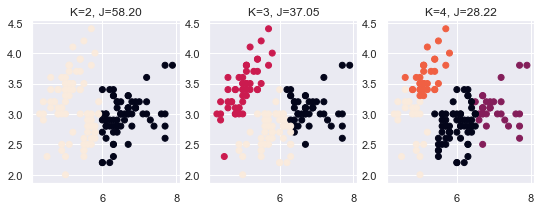

In [35]:
# K-means
# 초기 중심값이 결정.. 입력 -> 중심을 지속적으로 변화
# 중심과의 거리값

from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

iris = datasets.load_iris()
X = iris.data[:, :2] # 전체 변수 4개를 2개로 줄여서 씀
y_iris = iris.target
km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)

plt.figure(figsize=(9,3))

plt.subplot(131); plt.scatter(X[:,0], X[:,1], c=km2.labels_)# c : color 2(0,1) | labels_ : 군집번호
plt.title("K=2, J=%.2f"%km2.inertia_)# 군집 내부 거리 값 : 중심으로부터 각 요소가 떨어져 있는 값의 합계

plt.subplot(132); plt.scatter(X[:,0], X[:,1], c=km3.labels_)
plt.title("K=3, J=%.2f"%km3.inertia_)

plt.subplot(133); plt.scatter(X[:,0], X[:,1], c=km4.labels_)
plt.title("K=4, J=%.2f"%km4.inertia_)

km4.cluster_centers_

In [ ]:
X = np.array([[7,5], [5,7], [7,7], [4,4], [4,6], [1,4],
             [0,0], [2,2], [8,7], [6,8], [5,5], [3,7]])
print(X)
plt.scatter(X[:,0], X[:,1], s= 100)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# 레이블 : 군집번호:종속변수

model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=1, random_state=1).fit(X)
c0, c1 = model.cluster_centers_
print(len(model.labels_))

# boolean indexing..
plt.scatter(X[model.labels_==0, 0], X[model.labels_==0, 1], s=100, marker='v', c='r')
plt.scatter(X[model.labels_==1, 0], X[model.labels_==1, 1], s=100, marker='^', c='b')

plt.scatter(c0[0], c0[1], s=100, c='r')
plt.scatter(c1[0], c1[1], s=100, c='b')

plt.show()

In [ ]:
# 양자화
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [ ]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties( fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [ ]:
n_colors = 8

# 1byte = 8bits = 2^8 = 256
china = load_sample_image("flower.jpg") # RGB(256컬러 : 1byte)
china = np.array(china, dtype=np.float64) / 255 # 컬러값 정규화 0~1로

In [ ]:
w, h, d = original_shape = tuple(china.shape) # w,h : 이미지 행x열, d : 컬러값
print(w,h,d) # 427 x 640 , 3
assert d == 3 # RGB만 들어와라
image_array = np.reshape(china, (w*h, d)) # 2차원으로 변환

In [ ]:
image_array_sample = shuffle(image_array, random_state=0)[:1000] # 1000개의 행으로 fitting할 거

# 여러가지 색 중 64컬러로 군집화(Grouping)
kmeans = KMeans(n_clusters = n_colors, random_state=0).fit(image_array_sample)
# kmeans를 통해 64개의 중심값 결정 후

In [ ]:
labels = kmeans.predict(image_array) # 라벨 427 x 640
labels

NameError: name 'china' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51648 missing from curre

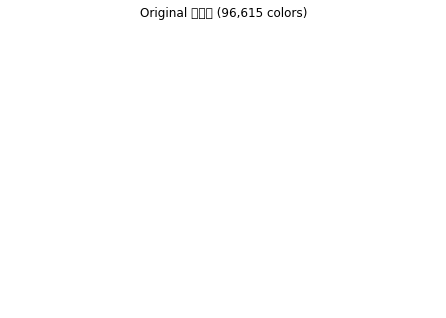

In [4]:
def recreate_image(codebook, labels, w, h): #codebook : 64컬러값 | lables : 이미지픽셀수 
    d = codebook.shape[1] # 64개의 중심값 64x3
    image = np.zeros((w, h, d)) # 원래 이미지 사이즈
    label_idx = 0
    
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# 원본 이미지
plt.figure(1)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Original 이미지 (96,615 colors)')
plt.imshow(china)

# 압축했다가 푼 64 컬러
plt.figure(2)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

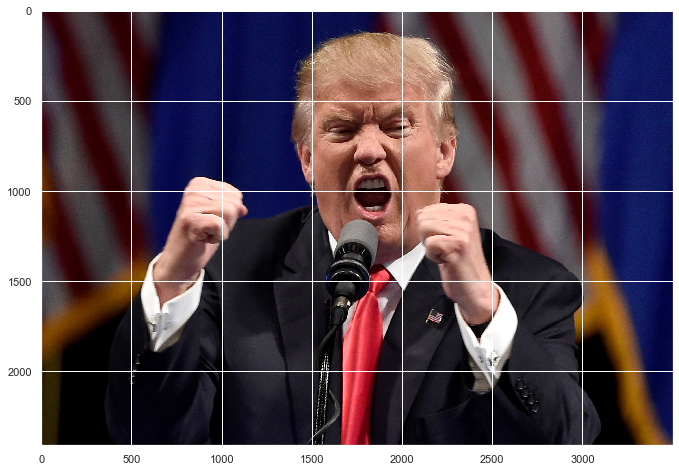

In [16]:
image = plt.imread("trump.jpg")
plt.figure(figsize = (15,8))
plt.imshow(image)

In [17]:
image.shape

(2411, 3500, 3)

In [18]:
# 바이트 수
image.shape[0] * image.shape[1] * image.shape[2]

25315500

In [19]:
x, y, z = image.shape
image = np.array(image, dtype = np.float64) / 255
image_2d = image.reshape(x*y,z)# k-means 할때 왜 차수를 줄여줘야하나? k-means는 3차원을 이해하지 못한다 그래서 2차원화해야..
image_2d.shape

(8438500, 3)

In [20]:
# 컬러를 16개로 클러스터링
kmeans_cluster = cluster.KMeans(n_clusters=16)
kmeans_cluster.fit(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_centers

array([[0.03504673, 0.04861608, 0.28764287],
       [0.58340932, 0.37180547, 0.30044538],
       [0.9635989 , 0.94909122, 0.93961227],
       [0.1113304 , 0.09685815, 0.1333948 ],
       [0.34744958, 0.26363686, 0.27403574],
       [0.42749716, 0.39048571, 0.4013766 ],
       [0.82902743, 0.6296146 , 0.56256022],
       [0.02435549, 0.01742899, 0.03561961],
       [0.22418545, 0.03512332, 0.03544592],
       [0.35884977, 0.14040816, 0.09678301],
       [0.55233369, 0.33734009, 0.07057718],
       [0.21172813, 0.1719776 , 0.20423057],
       [0.9352142 , 0.7893485 , 0.73948287],
       [0.82982327, 0.19494444, 0.25009977],
       [0.71629711, 0.50919419, 0.43617847],
       [0.06486594, 0.09769183, 0.36322763]])

In [12]:
len(cluster_centers)

16

In [13]:
cluster_centers.shape

(16, 3)

In [14]:
cluster_labels = kmeans_cluster.labels_
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

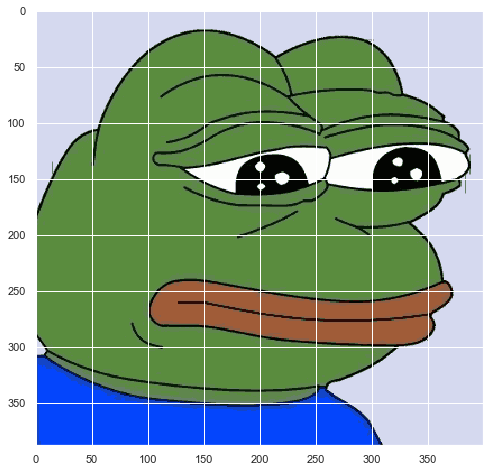

In [15]:
plt.figure(figsize = (15,8))
plt.imshow(cluster_centers[cluster_labels].reshape(x,y,z))

In [36]:
# 원형 이상치 제거
from sklearn.datasets import make_blobs
X, label = make_blobs(100, centers = 1)

In [37]:
kmeans = cluster.KMeans(n_clusters=1) # 중심 1개
kmeans.fit(X)
distances = kmeans.transform(X)# 각 데이터의 중심으로부터 값으로 변환
# ravel() 1차원화
# argsort : 인덱스를 소트하라
# [::-1] : 내림차순으로
# [:5] : 그중 5개
sorted_idx = np.argsort(distances.ravel())[::-1][:5]

In [39]:
f, ax = plt.subplot(figsize = (7,5))

ax.set_title('Single Cluster')
ax.scatter(X[:,0], X[:,1], label='Points')
ax.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1],
           label='Centroid', color='r')
ax.scatter(X[sorted_idx][:,0],
          X[sorted_idx][:,1],
          label='이상치', edgecolors='g',
          facecolors='none', s=100)

ax.legend(loc='best')

AttributeError: 'AxesSubplot' object has no property 'figsize'

<Figure size 432x288 with 0 Axes>

In [43]:
# pCA : Principle component Analysis 주성분 분석
# 모델 입력 전단에서 특칭추출(노이즈 제거)
# PCA의 결과를 모델의 변수로 추가하면 정확도 상승

import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1,-1], [-2,-1], [-3, -2], [1,1], [2,1], [3,2]])
pca = PCA(n_components=2) # 주성분 2개..
pca.fit(X)

print(pca.explained_variance_ratio_) # 설명력

# 차원축소후에 분석을 하면 좋은 점
# - 노이즈 제거
# - 속도 개선
# - 차원의 저주 : 차원이 너무 많으면 문제해결이 안됨. 그러므로 차원 수를 줄여줘야 문제 해결하기가 용이
#     => 복잡한 문제를 해결

print(pca.explained_variance_)# 분산이 큰 것이 주성분
print(pca.noise_variance_)

[0.99244289 0.00755711]
[7.93954312 0.06045688]
0.0


In [ ]:
# svd : singular value decomposition
# svd -> 희소행렬의 특징을 추출하기 위해 사용 [예) 텍스트 마이닝에서]
# 비정방행렬인 경우 사용

pca = PCA(n_components=2, svd_solver='full') 
# 'full' : 전체사이즈고려
# 'randomized' : 일부만 랜덤으로 (500x500 이상인 경우.)
# 'arpack' : 0을 제거한 후 출력

pca.fit(X)
print(pca.explained_variance_ratio_)

In [44]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
print(cancer.feature_names)
print(type(cancer))
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(type(X_train))
print(X_train.shape)
print(X_train.dtype)
print(X_test.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(426, 30)
float64
(143, 30)


In [45]:
# SVC로 테스트
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도 : 0.62


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도 : {:.2f}".format( svm.score(X_test_scaled, y_test) ))

스케일 조정된 테스트 세트의 정확도 : 0.97


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [53]:
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [55]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
#  2개의 주성분을 출력

X_pca = pca.transform(X_scaled)
print(pca.explained_variance_ratio_)

print("원본 데이터 형태 : {}".format(str(X_scaled.shape))) # 569 ,30
print("축소된 데이터 형태 : {}".format(str(X_pca.shape))) # 569, 2
# 28개의 특성을 제거

[0.44272026 0.18971182]
원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 30)


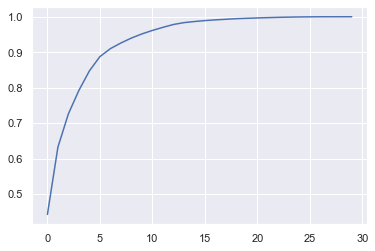

In [57]:
# 다시 30개로 바꿔보자
pca = PCA(n_components=30)
pca.fit(X_scaled)
#  2개의 주성분을 출력

X_pca = pca.transform(X_scaled)
print(pca.explained_variance_ratio_)

print("원본 데이터 형태 : {}".format(str(X_scaled.shape))) # 569 ,30
print("축소된 데이터 형태 : {}".format(str(X_pca.shape))) # 569, 2
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # elbow를 시각적으로 확인할 수

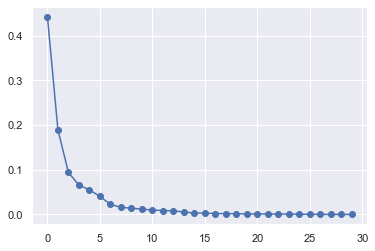

In [58]:
plt.plot(pca.explained_variance_ratio_, 'bo-')

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # z점수 정규화
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components=6) # 전체변수 30개
pca.fit(X_train_scaled)
X_t_train = pca.transform(X_train_scaled)
X_t_test = pca.transform(X_test_scaled)
svm.fit(X_t_train,y_train)
print("SVM 테스트 정확도 : {:.2f}".format(svm.score(X_t_test, y_test)))

# 6 : 92%
# 9 : 94%
# 15 : 94%
# 20 : 95%
# 30 : 97%

# 3% 때문에 변수 15개를 쓸 필요는 없다....
# 그냥 9개쯤에서 정리하자

# 가성비
# 정확도만 높다고 좋은 것이 아니다 신뢰성도 어느정도 좋아야..
# 근데 정확도와 신뢰성은 trade off관계다.. 둘다 최상으로 좋을 순 없다는거지

SVM 테스트 정확도 : 0.92


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [69]:
print("PCA 주성분 형태 : {}".format(pca.components_.shape))
# 주성분 6개, 전체 변수 30개        즉, 주성분을 30의 변수가 설명 -> 주성분 축 : 명명
# 변수의 기여도를 보고 명명식을 해야...

PCA 주성분 형태 : (6, 30)


In [70]:
print("PCA 주성분 : {}".format(pca.components_))
# 각 축 중 데이터에 영향을 강하게 준 것이 뭔지 값의 크기를 보고 판단해볼 수 있다.
# 본 예의 변수들은 직교하기 때문에 다중공손성은 발생하지 않는다

PCA 주성분 : [[ 2.27727952e-01  1.15125429e-01  2.34880866e-01  2.29368295e-01
   1.34257906e-01  2.37160022e-01  2.57472643e-01  2.60831732e-01
   1.28883480e-01  4.44771262e-02  2.05926703e-01  1.45035459e-02
   2.10480600e-01  2.02438009e-01  1.01867571e-02  1.64939913e-01
   1.53175867e-01  1.78415012e-01  2.46122358e-02  9.25782919e-02
   2.32908159e-01  1.12324737e-01  2.40809688e-01  2.29457569e-01
   1.22454525e-01  2.08303026e-01  2.29910791e-01  2.49291962e-01
   1.15240250e-01  1.26763277e-01]
 [-2.15362267e-01 -6.01602111e-02 -1.97386080e-01 -2.12242935e-01
   1.93714685e-01  1.61665826e-01  6.56584195e-02 -2.40618685e-02
   1.88332406e-01  3.77871193e-01 -9.33235914e-02  1.04195564e-01
  -8.12542149e-02 -1.40402031e-01  2.19281447e-01  2.51896246e-01
   2.15694850e-01  1.53310362e-01  1.93854431e-01  3.02040600e-01
  -2.10358120e-01 -5.51038409e-02 -1.91044086e-01 -2.09342024e-01
   1.56961739e-01  1.32043594e-01  8.62556801e-02 -1.22824865e-02
   1.09276647e-01  2.71509521e-

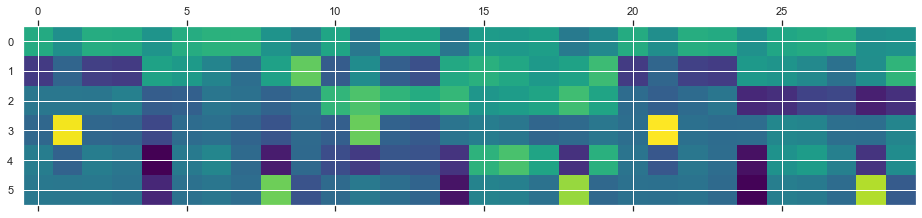

In [71]:
plt.matshow(pca.components_, cmap='viridis')